In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

<AxesSubplot:>

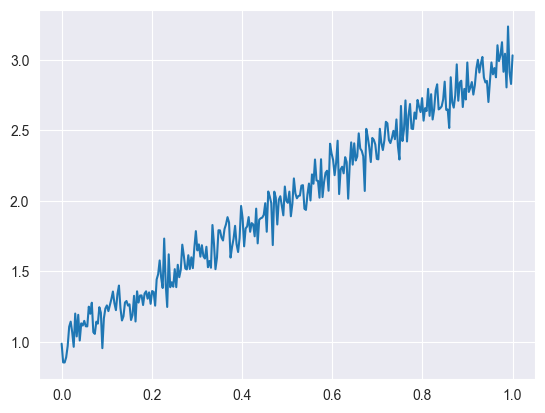

In [7]:
# generate a time series of a stock price with a trend and noise    
def generate_stock_price(periods):
    x = np.linspace(0, 1, periods)
    y = 2 * x + np.random.lognormal(0, 0.1, periods)
    return y

periods = 300
y = generate_stock_price(periods)
sns.lineplot(x=np.linspace(0, 1, periods), y=y)

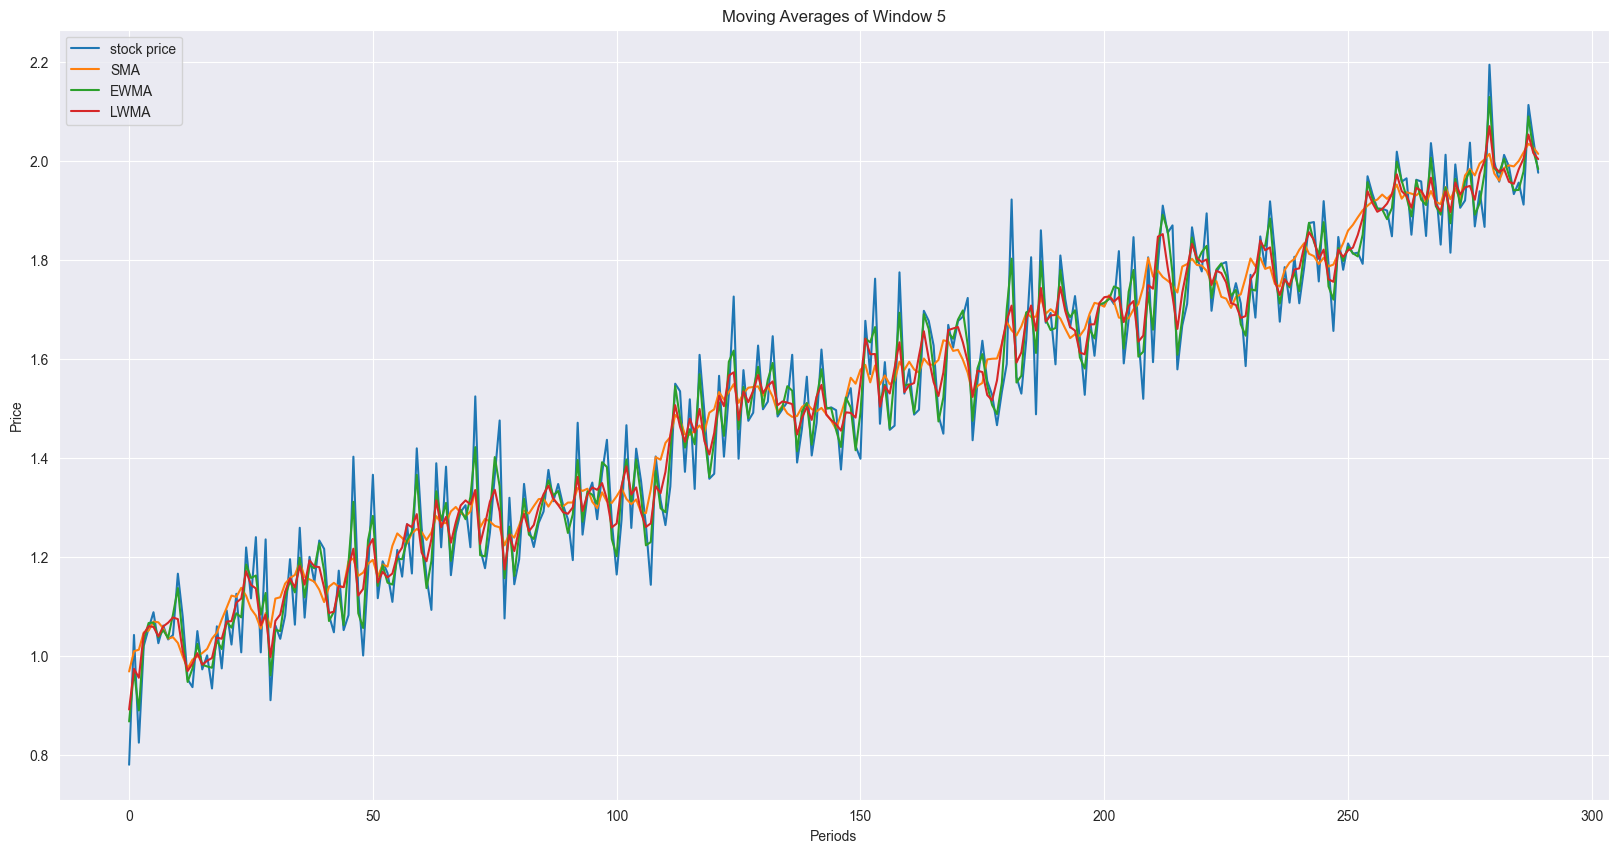

In [11]:
def linear_weighted_moving_average(y, window):
    """
    Calculate the linearly weighted moving average of a time series.
    
    Example:
    90, 92, 93, 91, 95, window = 3

    np.linspace(1, 0, window) = [1, 0.5, 0]
    [90, 92, 93].dot([1, 0.5, 0]) = 90 + 46 + 0 = 136 / sum([1, 0.5, 0]) = 136 / 1.5 = 90.67
    """
    weights = np.linspace(1, 0, window)
    return [np.dot(y[i:i+window], weights) / sum(weights) for i in range(len(y)-window)]

def exponentially_weighted_moving_average(y, window=5, smoothing=2):
    """
    Calculate the exponentially weighted moving average of a time series.

    First Day:  EMA =  Price(1)
    Second Day: EMA = (Price(2) * alpha) + (EMA(1) * (1-alpha))
                    = (Price(2) * alpha) + (Price(1) * (1-alpha))
    Third Day:  EMA = (Price(3) * alpha) + (EMA(2) * (1-alpha))
                    = (Price(3) * alpha) + (1-alpha)(Price(2) * alpha + (1-alpha) * EMA(1))

    Start calculating the average 1 day after the first day.
    """
    alpha = smoothing / (window + 1)
    # this code changes y in place. And the first value is unchanged.
    # if alpha is 1 then the EWMA is the same as the price - the graph is identical
    return [y[i] * alpha + y[i-1] * (1 - alpha) for i in range(1, len(y))]

# generate a simulation of a lognormal stock price
def generate_stock_price_simulation(periods, simulations=0, window=5, smoothing=2):
    x = np.linspace(0, 1, periods)
    y = x + np.random.lognormal(0, 0.1, periods)
    
    # calculate simple moving average of window 5
    sma = [y[i:i+window+1].mean() for i in range(window, len(y)-window)]

    # play around with the window and smoothing parameters, the higher the window
    # the more the moving average will follow track the actual price
    ewma = exponentially_weighted_moving_average(y[window:-window+1], window=window, smoothing=2)

    lwma = linear_weighted_moving_average(y, window=window)

    return y, sma, ewma, lwma

window = 5
y, sma, ewma, lwma = generate_stock_price_simulation(300, window=window)

plt.figure(figsize=(20, 10))
plt.xlabel("Periods")
plt.ylabel("Price")
plt.title("Moving Averages of Window {}".format(window))
plt.plot(y[window:-window], label="stock price")
plt.plot(sma, label="SMA")
plt.plot(ewma, label="EWMA")
plt.plot(lwma[window:], label="LWMA")
plt.legend()

In [5]:
print(
    len(y[window:-window]), len(sma), len(ewma), len(lwma[window:])
)

90 90 90 90
